*This notebook can be found on* [github](https://github.com/qojulia/QuantumOptics.jl-examples/tree/master/notebooks/pumped-cavity.ipynb)

# Pumped cavity

In [9]:
using QuantumOptics
using PyPlot

Define parameters

In [2]:
using Random; Random.seed!(0)
η = 0.9 # Pumping strength
κ = 1 # Decay rate

Ncutoff = 20 # Maximum photon number
T = [0:0.1:10;];

 Create Fock basis and all operators

In [3]:
basis = FockBasis(20)
a = destroy(basis)
at = create(basis)
n = number(basis)
H = η*(a+at)
J = [sqrt(κ)*a];

Define initial state

In [4]:
Ψ₀ = fockstate(basis, 10)
ρ₀ = Ψ₀ ⊗ dagger(Ψ₀);

Time evolution according to master equation

In [5]:
tout, ρt_master = timeevolution.master(T, ρ₀, H, J);

## Parameter meanings

T:      Time grids
ρ₀:     Initial states
H:      Hamiltonian
J:      Jump Operators


In [21]:
H

Operator(dim=21x21)
  basis: Fock(cutoff=20)sparse([2, 1, 3, 2, 4, 3, 5, 4, 6, 5  …  17, 16, 18, 17, 19, 18, 20, 19, 21, 20], [1, 2, 2, 3, 3, 4, 4, 5, 5, 6  …  16, 17, 17, 18, 18, 19, 19, 20, 20, 21], ComplexF64[0.9 + 0.0im, 0.9 + 0.0im, 1.2727922061357857 + 0.0im, 1.2727922061357857 + 0.0im, 1.5588457268119895 + 0.0im, 1.5588457268119895 + 0.0im, 1.8 + 0.0im, 1.8 + 0.0im, 2.012461179749811 + 0.0im, 2.012461179749811 + 0.0im  …  3.6 + 0.0im, 3.6 + 0.0im, 3.7107950630558952 + 0.0im, 3.7107950630558952 + 0.0im, 3.818376618407356 + 0.0im, 3.818376618407356 + 0.0im, 3.9230090491866068 + 0.0im, 3.9230090491866068 + 0.0im, 4.024922359499622 + 0.0im, 4.024922359499622 + 0.0im], 21, 21)

Three different monte carlo trajectories

In [6]:
tout_example1, Ψt_example1 = timeevolution.mcwf(T, Ψ₀, H, J; seed=UInt(1),
                                        display_beforeevent=true,
                                        display_afterevent=true)

tout_example2, Ψt_example2 = timeevolution.mcwf(T, Ψ₀, H, J; seed=UInt(2),
                                        display_beforeevent=true,
                                        display_afterevent=true)

tout_example3, Ψt_example3 = timeevolution.mcwf(T, Ψ₀, H, J; seed=UInt(3),
                                        display_beforeevent=true,
                                        display_afterevent=true);

Calculate expectation values $\langle n(t) \rangle$ by averaging single monte carlo trajectory expectation values

In [7]:
Ntrajectories = 50

n_average = zeros(Float64, length(T))
function fout(t::Float64, psi::Ket)
    i = findfirst(isequal(t), T)
    n_average[i] += real(expect(n, psi)/norm(psi)^2)
end

for i=1:Ntrajectories
    timeevolution.mcwf(T, Ψ₀, H, J; fout=fout)
end
n_average /= Ntrajectories;

Plot the result $\langle n(t) \rangle$ for the master equation, three different single MCWF trajectories and the average of many MCWF trajectories

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


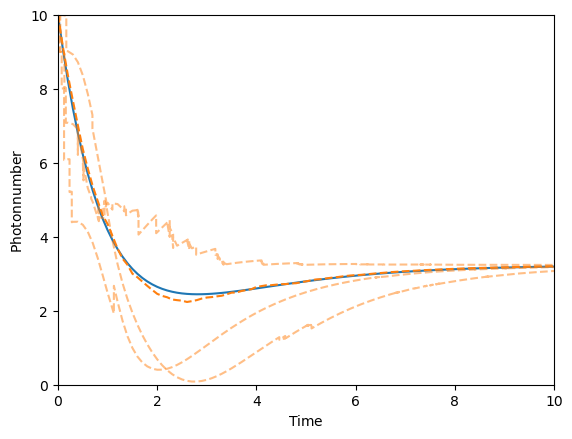

In [8]:
plot(T, real(expect(n, ρt_master)))
plot(T, n_average, "--")
plot(tout_example1, real(expect(n, Ψt_example1)), "C1--", alpha=0.5)
plot(tout_example2, real(expect(n, Ψt_example2)), "C1--", alpha=0.5)
plot(tout_example3, real(expect(n, Ψt_example3)), "C1--", alpha=0.5)

xlim(0, 10)
ylim(0, 10)
xlabel(L"\mathrm{Time}")
ylabel(L"\mathrm{Photon number}");
show()